In [13]:
%matplotlib inline
import pylab
import matplotlib.pyplot as plt

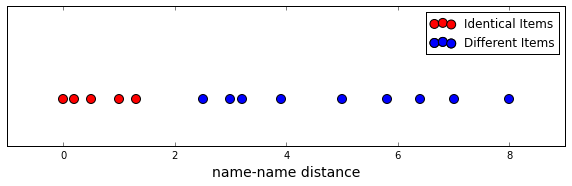

In [51]:
fig = plt.figure()
fig.set_size_inches(10, 2.5)
ax = pylab.gca()
ax.yaxis.set_visible(False)
ax.set_xlabel("name-name distance")
ax.set_ylim([0,3])
matches = plt.scatter([0,1,0.5,0.2,1.3], [1,1,1,1,1], s=80, c='r')
not_matches = plt.scatter([2.5,3,3.2,5,7,8,5.8,3.9,6.4], [1,1,1,1,1,1,1,1,1], s=80, c='b')
plt.legend([matches, (matches, not_matches)], ["Identical Items", "Different Items"])
ax.xaxis.label.set_fontsize(14)

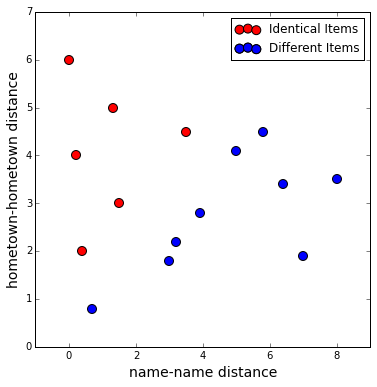

In [68]:
fig = plt.figure()
fig.set_size_inches(6, 6)
ax = pylab.gca()
ax.set_xlabel("name-name distance")
ax.set_ylabel("hometown-hometown distance")
# ax.set_ylim([0,3])
matches = plt.scatter([0,0.4,1.5,0.2,1.3,3.5], [6,2,3,4,5,4.5], s=80, c='r')
not_matches = plt.scatter([0.7,3,3.2,5,7,8,5.8,3.9,6.4], [0.8,1.8,2.2,4.1,1.9,3.5,4.5,2.8,3.4], s=80, c='b')
plt.legend([matches, (matches, not_matches)], ["Identical Items", "Different Items"])
ax.xaxis.label.set_fontsize(14)
ax.yaxis.label.set_fontsize(14)

In [1]:
from Levenshtein import distance
import numpy as np
from sklearn.manifold import MDS

In [2]:
items = ['dog', 'doge', 'kitten', 'kitteh']

def pairwise_distances(items, distance):
    return [[distance(row_item, col_item) for col_item in items]
                                          for row_item in items]

distances = np.array(pairwise_distances(items, distance))
print distances

[[0 1 6 6]
 [1 0 5 5]
 [6 5 0 1]
 [6 5 1 0]]


In [5]:
mds = MDS(dissimilarity='precomputed',
          random_state=57)
coords = mds.fit_transform(distances)

In [9]:
for x, y in coords: print x, y

-2.43042867107 -2.09298649926
-1.37709935297 -1.83448168386
2.2544835301 1.6182824929
1.55304449394 2.30918569022


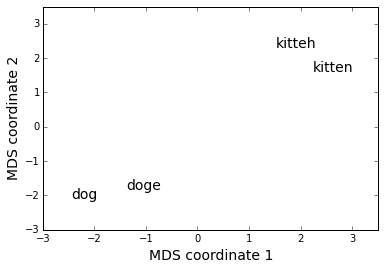

In [19]:
fig = plt.figure()
ax = pylab.gca()
for word, xy in zip(items, coords):
    ax.annotate(word, xy=xy, fontsize=14)
ax.set_ylim([-3, 3.5])
ax.set_xlim([-3, 3.5])
ax.set_xlabel("MDS coordinate 1")
ax.set_ylabel("MDS coordinate 2")
ax.xaxis.label.set_fontsize(14)
ax.yaxis.label.set_fontsize(14)